# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib notebook

boston = pd.read_csv('https://raw.githubusercontent.com/RodzMoraes/curso-ebac/main/M%C3%B3dulo%2011/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

In [5]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [8]:
# Verificando se não há valores ausentes
print(boston.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [9]:
# Verificando se todas as colunas são numéricas
numeric_cols = X.select_dtypes(include='number').columns
non_numeric_cols = X.select_dtypes(exclude='number').columns

print("Colunas numéricas:")
print(numeric_cols)

print("Colunas não numéricas:")
print(non_numeric_cols)

Colunas numéricas:
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')
Colunas não numéricas:
Index([], dtype='object')


In [10]:
# Verificar se não há valores infinitos ou muito grandes
print(X.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

<IPython.core.display.Javascript object>


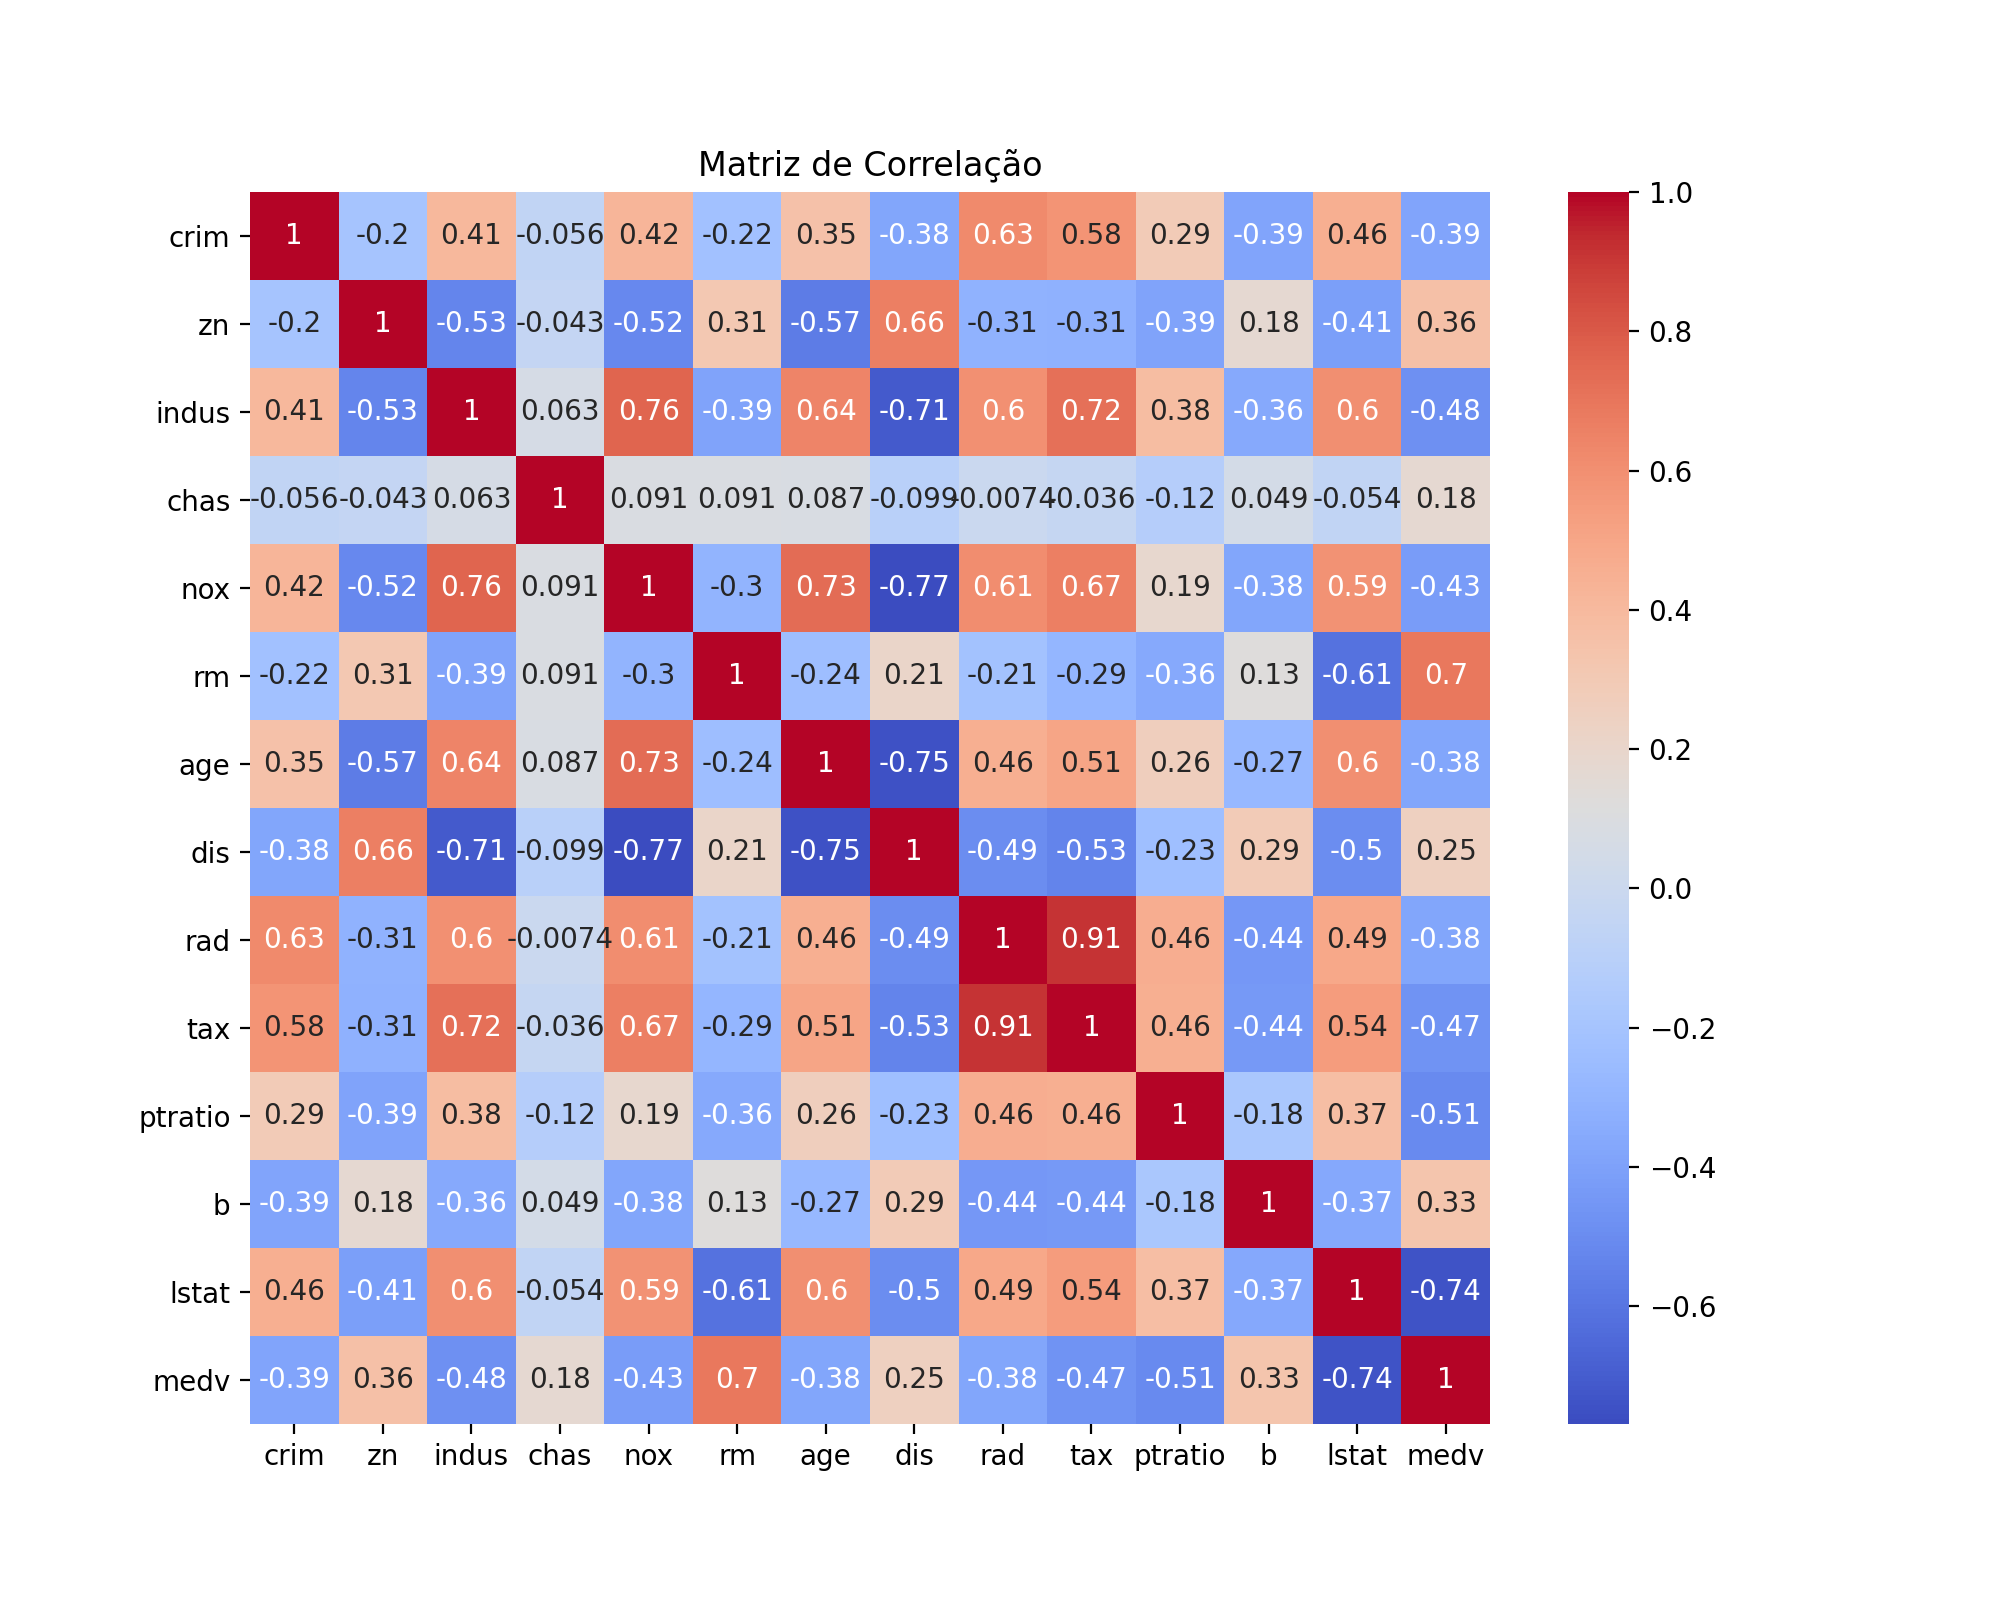

In [58]:
correlation_matrix = boston.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [59]:
matriz_correlacao = boston.corr()
matriz_correlacao

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Analisando a matriz de correlação, algumas variáveis parecem ter um bom potencial preditivo em relação à variável alvo ('medv'). Seguem alguns insights:

- A variável 'rm' (número médio de quartos por habitação) possui uma correlação positiva significativa de 0,695360 com 'medv'. Isso indica que casas com um número maior de quartos tendem a ter um valor médio mais alto.

- A variável 'zn' (proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés quadrados) tem uma correlação positiva moderada de 0,360445 com 'medv'. Isso indica que áreas residenciais com terrenos maiores podem estar associadas a valores mais altos.

### 3. Separe os dados em validação e teste

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Dados de treinamento:", X_train.shape, y_train.shape)
print("Dados de validação:", X_val.shape, y_val.shape)
print("Dados de teste:", X_test.shape, y_test.shape)

Dados de treinamento: (323, 13) (323,)
Dados de validação: (81, 13) (81,)
Dados de teste: (102, 13) (102,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [75]:
# Árvore com profundidade máxima de 8
tree_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_8.fit(X_train, y_train)

# Árvore com profundidade máxima de 2
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [76]:
# MSE da árvore com profundidade máxima 8
y_train_8 = tree_8.predict(X_train)
mse_train_8 = mean_squared_error(y_train, y_train_8)
y_test_8 = tree_8.predict(X_test)
mse_test_8 = mean_squared_error(y_test, y_test_8)

# MSE da árvore com profundidade máxima 2
y_train_2 = tree_2.predict(X_train)
mse_train_2 = mean_squared_error(y_train, y_train_2)
y_test_2 = tree_2.predict(X_test)
mse_test_2 = mean_squared_error(y_test, y_test_2)

print("MSE da árvore com profundidade máxima 8:")
print("Treinamento:", mse_train_8)
print("Teste:", mse_test_8)
print()
print("MSE da árvore com profundidade máxima 2:")
print("Treinamento: ", mse_train_2)
print("Teste: ", mse_test_2)

MSE da árvore com profundidade máxima 8:
Treinamento: 1.990153258488218
Teste: 26.62063634463257

MSE da árvore com profundidade máxima 2:
Treinamento:  23.45005359827078
Teste:  27.889817721649035


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade máxima 8 apresenta um MSE mais baixo tanto para a base de treinamento quanto para a base de teste em comparação com a árvore com profundidade máxima 2.

Isso indica que a árvore com profundidade máxima 8 tem uma melhor capacidade de generalização, ou seja, é mais adequada para fazer previsões em dados não vistos anteriormente, e portanto ela parece ser mais adequada.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

<IPython.core.display.Javascript object>


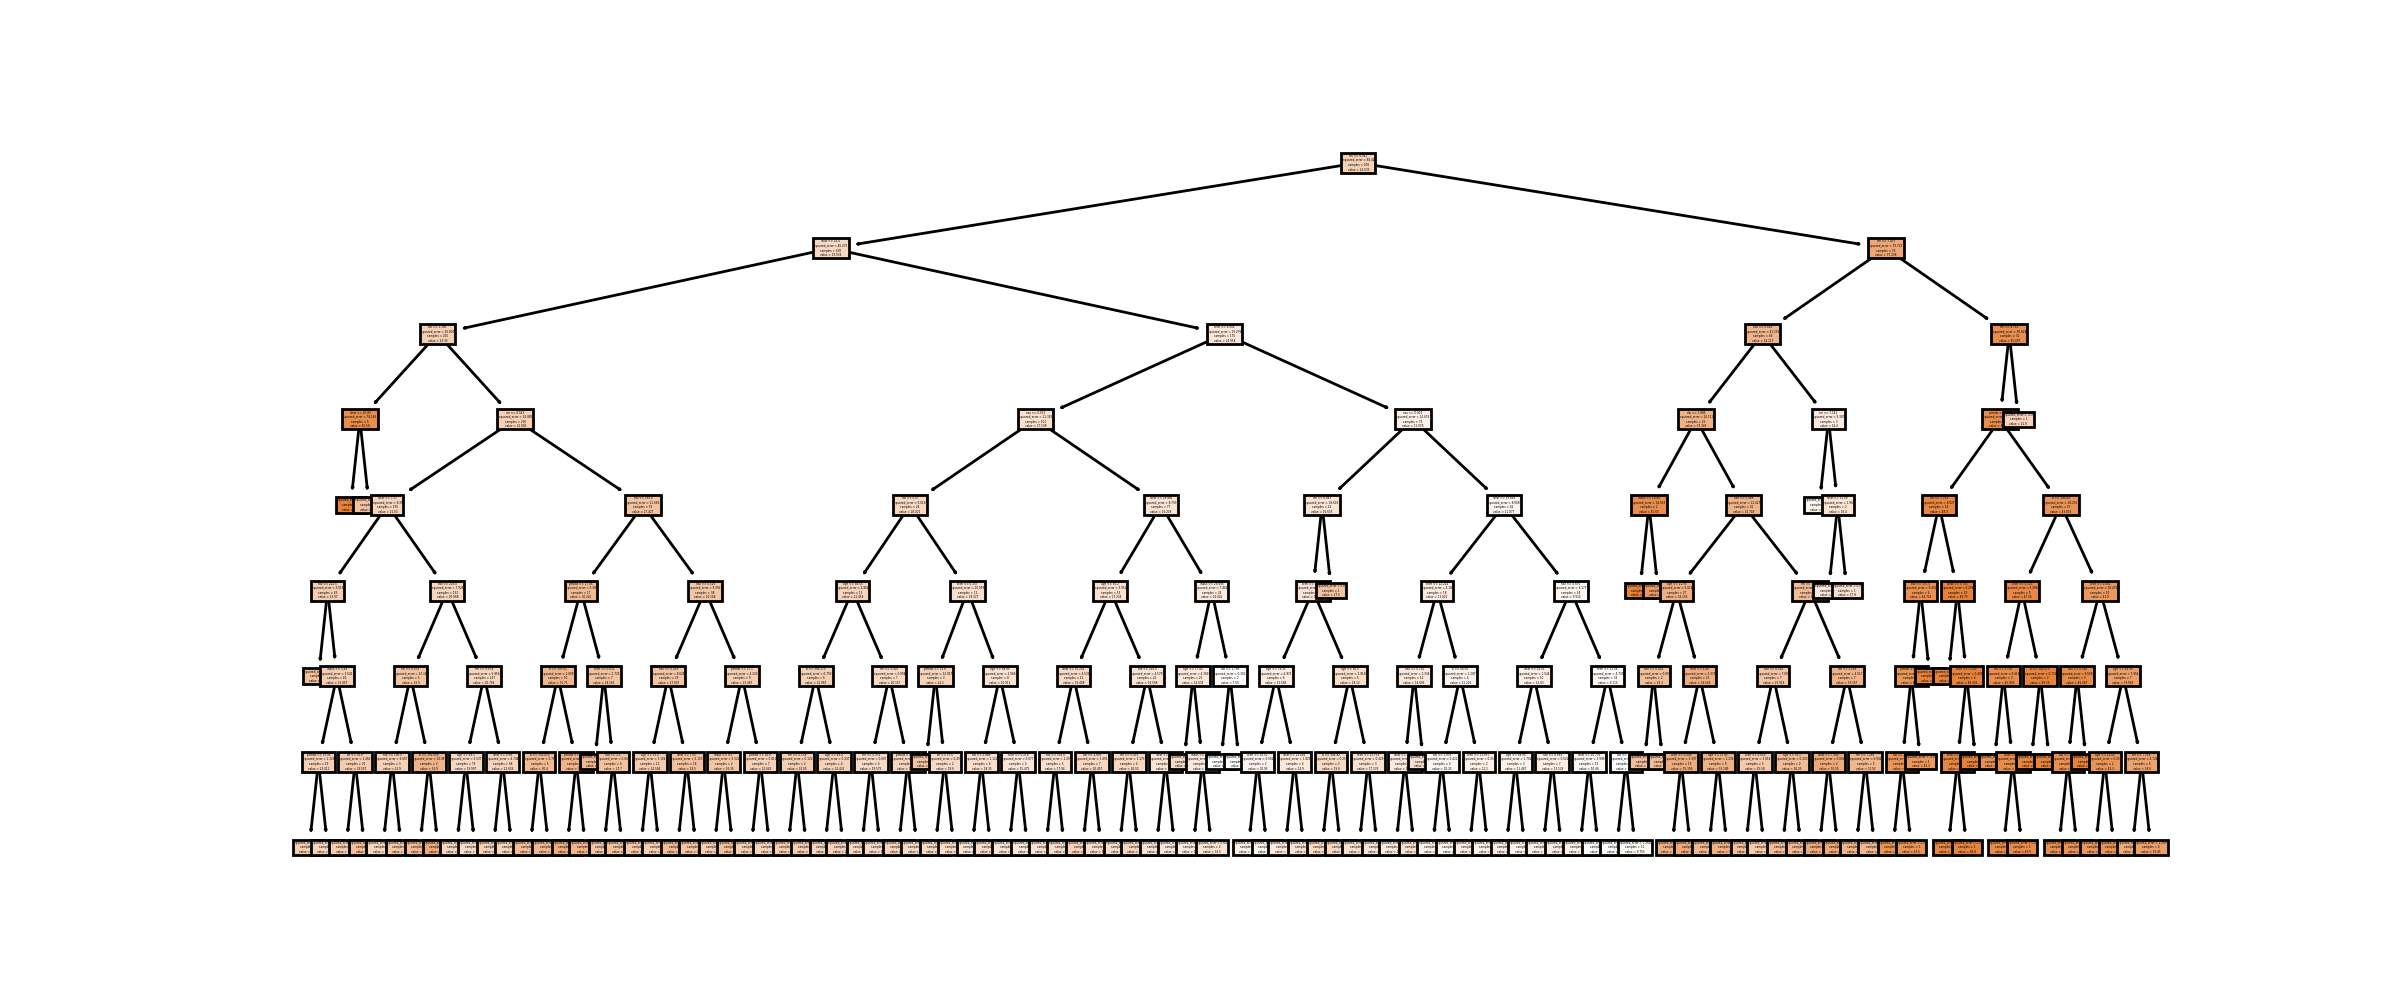

In [77]:
X = boston.drop(columns=['medv']).copy()
y = boston['medv']

tree_8 = tree.DecisionTreeRegressor(max_depth=8)
tree_8.fit(X, y)

plt.figure(figsize=(12, 5))
tree.plot_tree(tree_8, feature_names=X.columns, filled=True)
plt.show()

In [78]:
# Acessar os atributos da árvore
feature_importances = tree_8.feature_importances_
n_features = len(X.columns)

# Criar um DataFrame com as informações da árvore
tree_data = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar o DataFrame por importância das features
tree_data = tree_data.sort_values(by='Importance', ascending=False)

# Imprimir os dados da árvore
print(tree_data)

    Feature  Importance
5        rm    0.600219
12    lstat    0.206880
7       dis    0.071061
4       nox    0.050068
0      crim    0.035569
9       tax    0.012795
6       age    0.008082
10  ptratio    0.007035
2     indus    0.004214
11        b    0.003443
1        zn    0.000542
8       rad    0.000087
3      chas    0.000006


A variável que parece mais importante é a 'rm' (número médio de quartos por habitação).

A importância dessa variável fica em torno de 0.600, o que significa que ela desempenha um importante papel na tomada de decisão da árvore.

Isso indica que o número médio de quartos por habitação tem um forte impacto na previsão do valor mediano das casas (medv).